<a href="https://colab.research.google.com/github/francianerod/meteoblue-do-BRASIL/blob/main/CnC_Risco_de_Inc%C3%AAndio_Florestal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Código feito por:** Franciane Rodrigues

**Empresa:** meteoblue do Brasil

**Área/Setor:** Pesquisa e Desenvolvimento

**Motivo do código:** Modelagem para riscos de incêndio florestal

**Teoria**: Fórmula de Monte Alegre

**Referência:** SOARES, R. V. 1972. “Determinação de Um ı́ndice de Perigo de Incêndio Para a Região Centro Paranaense, Brasil. Turrialba, Costa Rica, Catie/Iica,. 72 P.” Dissertação de Mestrado.

### **OBSERVAÇÕES TÉCNICAS**

1. É relevante salientar que o risco de incêndio calculado pela FMA é um modelo
matemático empírico e não leva em consideração a biomassa combustível disponível, a umidade do solo, a velocidade do vento, a radiação solar incidente e a cobertura vegetal. A descrição detalhada do Índice de Risco de Incêndio Florestal FMA pode ser consultada em SOARES (1972).

2. O FMA pode ser calculado e atualizado no sistema à cada hora com dados
previstos da CLIMA no Campo bem como realizar monitoramento por estações meteorológicas automáticas. Na metodologia, são considerados os dados de precipitação pluviométrica acumulada nas últimas 24 horas e umidade
relativa do ar (UR%) medida às 13:00 horas. Para o cálculo utiliza-se a fórmula de risco de incêndio proposto por Soares, 1972, através da seguinte expressão:

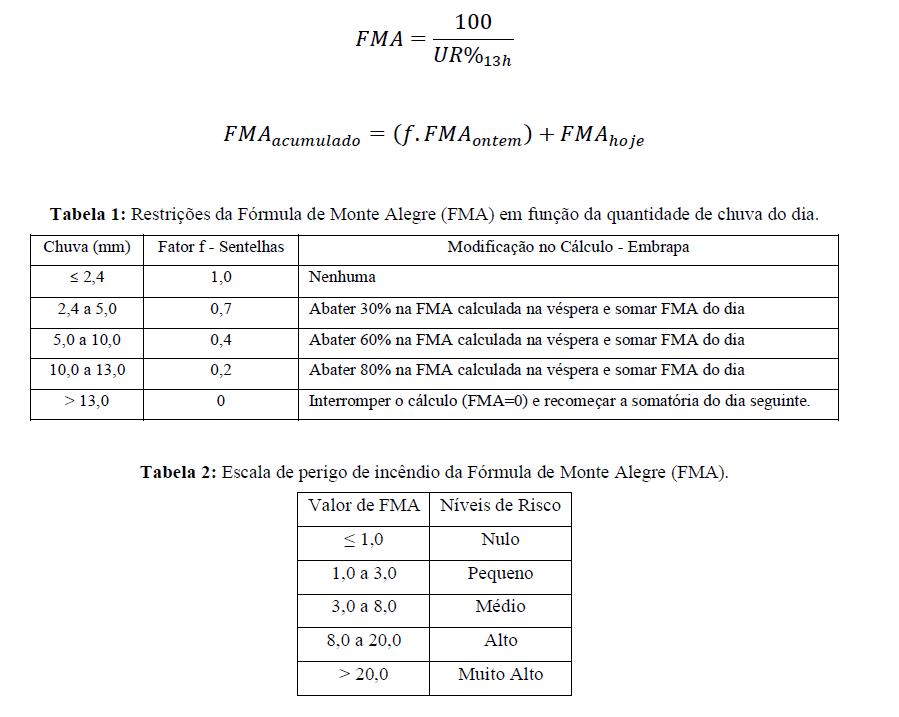

### **RISCO DE INCÊNDIO FLORESTAL**

Fórmula de Monte Alegre para Risco de Incêndio Florestal
*   Passo 1: Abrir as bibliotecas
*   Passo 2: Entrada de dados
*   Passo 3: Calcular o fator
*   Passo 4: Fórmula de Monte Alegre Unitária
*   Passo 5: Fórmula de Monte Alegre Acumulada
*   Passo 6: Classificação

In [ ]:
# Passo 1: Abrir as bibliotecas
# Importação de biblioteca
import pandas as pd

In [ ]:
# Passo 2: Entrada de dados
# Entrada de dados - UR% as 13 horas local e acumulado de chuva diário (AC) (total de  24h - a partir de ontem 13h local até hoje as 13h local)
# Dados ficticios

ur = [89, 67.5, 62, 58.5, 49, 46.5, 40.5, 63.5, 62.5, 58.5, 79, 49, 48, 63.5, 53, 73.5, 95, 48, 40, 35, 20, 15, 17, 85]
ppt = [13, 0, 0, 0.4, 0, 0.2, 0.2, 0, 0, 0, 0.2, 0.2, 0.2, 3.4, 0.4, 0, 15, 0, 0, 0, 0, 0, 0.2, 30]

# Obtenha a lista de tuplas de duas listas e mescle-as usando zip().
lista_de_tuplas = list(zip(ur, ppt))

# converte uma lista de tuplas num DataFrame
df = pd.DataFrame(lista_de_tuplas, columns=['ur', 'ppt'])

# Mostre as cinco primeiras posições
#df.head()

In [ ]:
#Passo 3: Cálculo do Fator

def func1(column):

    if column['ppt'] < 2.4:
       return 1

    elif column['ppt'] >= 2.4 and column['ppt'] < 5.0:
      return 0.7

    elif column['ppt'] >= 5.0 and column['ppt'] < 10.0:
       return 0.4

    elif column['ppt'] >= 10.0 and column['ppt'] < 13.0:
       return 0.2

    else: 
       return 0

#Aplicando a função em uma nova coluna chamada "f" (fator)
df['f'] = df.apply(func1, axis=1)
#print(df)

In [ ]:
# Passo 4: Cálculo do FMA unitário

def func2(column):
    return 100/column['ur']

#Aplicando a função em uma nova coluna chamada "fma_hoje"
df['fma_hoje'] = round(df.apply(func2, axis=1),1)

#print(df)

In [ ]:
# Passo 5: Cálculo do FMA acumulado usando função, com laço "for" e estrutura de controle de fluxo "if" 

def calcular(df):
    resultado = []
    resultado_anterior = 1.1

    for index, column in df.iterrows():
        if column['ppt'] > 13:
            resultado.append(0)
            resultado_anterior = 0
            continue
        resultado_atual = column['fma_hoje'] + column['f'] * resultado_anterior
        resultado.append(resultado_atual)
        resultado_anterior = resultado_atual

    df['fma'] = resultado
    return df

# Calculando a função
fma = calcular(df)
#print(round(fma,1))

In [ ]:
#Passo 6: Classificação

def func2(column):

    if column['fma'] <= 1.0:
       return "Nulo"

    elif column['fma'] > 1.0 and column['fma'] <= 3.0:
      return "Pequeno"

    elif column['fma'] > 3.0 and column['fma'] <= 8.0:
       return "Médio"

    elif column['fma'] > 8.0 and column['fma'] <= 20.0:
       return "Alto"

    else: 
       return "Muito Alto"

#Aplicando a função em uma nova coluna chamada "class"
df['class'] = df.apply(func2, axis=1)
print(df)

      ur   ppt    f  fma_hoje    fma       class
0   89.0  13.0  0.0       1.1   1.10     Pequeno
1   67.5   0.0  1.0       1.5   2.60     Pequeno
2   62.0   0.0  1.0       1.6   4.20       Médio
3   58.5   0.4  1.0       1.7   5.90       Médio
4   49.0   0.0  1.0       2.0   7.90       Médio
5   46.5   0.2  1.0       2.2  10.10        Alto
6   40.5   0.2  1.0       2.5  12.60        Alto
7   63.5   0.0  1.0       1.6  14.20        Alto
8   62.5   0.0  1.0       1.6  15.80        Alto
9   58.5   0.0  1.0       1.7  17.50        Alto
10  79.0   0.2  1.0       1.3  18.80        Alto
11  49.0   0.2  1.0       2.0  20.80  Muito Alto
12  48.0   0.2  1.0       2.1  22.90  Muito Alto
13  63.5   3.4  0.7       1.6  17.63        Alto
14  53.0   0.4  1.0       1.9  19.53        Alto
15  73.5   0.0  1.0       1.4  20.93  Muito Alto
16  95.0  15.0  0.0       1.1   0.00        Nulo
17  48.0   0.0  1.0       2.1   2.10     Pequeno
18  40.0   0.0  1.0       2.5   4.60       Médio
19  35.0   0.0  1.0 